In [1]:
import pandas as pd
train_data = pd.read_csv("datasets/Training.csv")

In [2]:
print("Train data shape", train_data.shape)
train_data.head()

Train data shape (84534, 10)


,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044331,-0.385883,1,1,2,2


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84534 entries, 0 to 84533
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         84534 non-null  int64  
 1   Promotion  84534 non-null  object 
 2   purchase   84534 non-null  int64  
 3   V1         84534 non-null  int64  
 4   V2         84534 non-null  float64
 5   V3         84534 non-null  float64
 6   V4         84534 non-null  int64  
 7   V5         84534 non-null  int64  
 8   V6         84534 non-null  int64  
 9   V7         84534 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 6.4+ MB


In [4]:
train_data.drop(columns=["ID"])

,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,No,0,2,30.443518,-1.165083,1,1,3,2
1,No,0,3,32.159350,-0.645617,2,3,2,2
2,No,0,2,30.431659,0.133583,1,1,4,2
3,No,0,0,26.588914,-0.212728,2,1,4,2
4,Yes,0,3,28.044331,-0.385883,1,1,2,2
...,...,...,...,...,...,...,...,...,...
84529,No,0,1,30.084876,1.345672,1,1,3,1
84530,Yes,0,3,33.501485,-0.299306,1,1,4,1
84531,No,0,1,31.492019,1.085939,2,3,2,2
84532,No,0,1,37.766106,0.999361,2,2,1,2


In [5]:
train_data["purchase"].nunique()

2

In [6]:
train_data["V1"].nunique()

4

In [7]:
train_data["V4"].nunique()

2

In [8]:
train_data["V5"].nunique()

4

In [9]:
train_data["V6"].nunique()

4

In [10]:
train_data["V7"].nunique()

2

In [11]:
treatment = train_data[(train_data['Promotion'] == 'Yes')]
pur_treat = train_data[(train_data['purchase'] == 1) & (train_data['Promotion'] == 'Yes')]
control = train_data[(train_data['Promotion'] == 'No')]
pur_control = train_data[(train_data['purchase'] == 1) & (train_data['Promotion'] == 'No')]

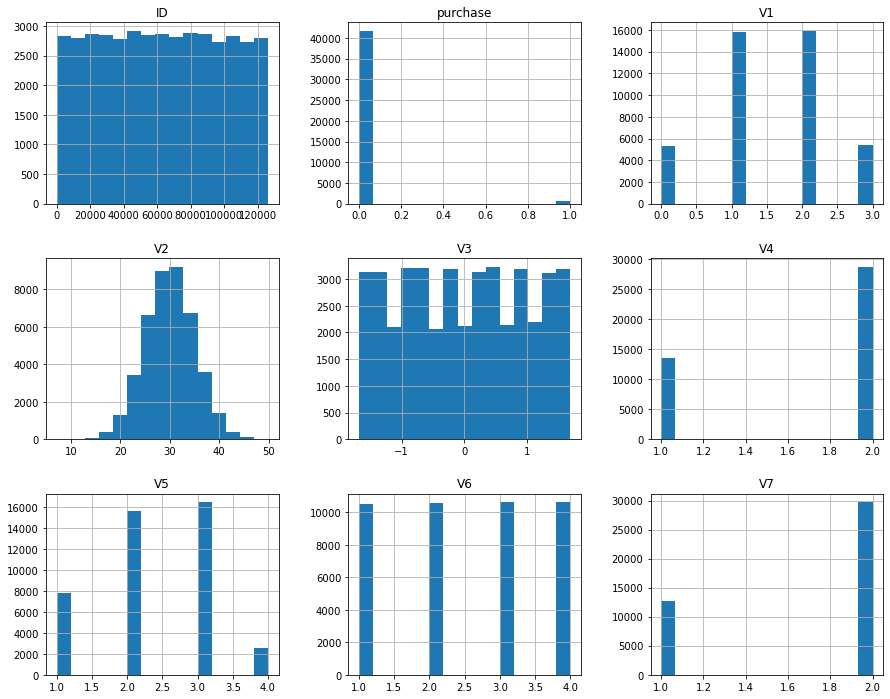

In [12]:
import matplotlib.pyplot as plt

treatment.hist(figsize=(15,12),bins = 15)
plt.show()

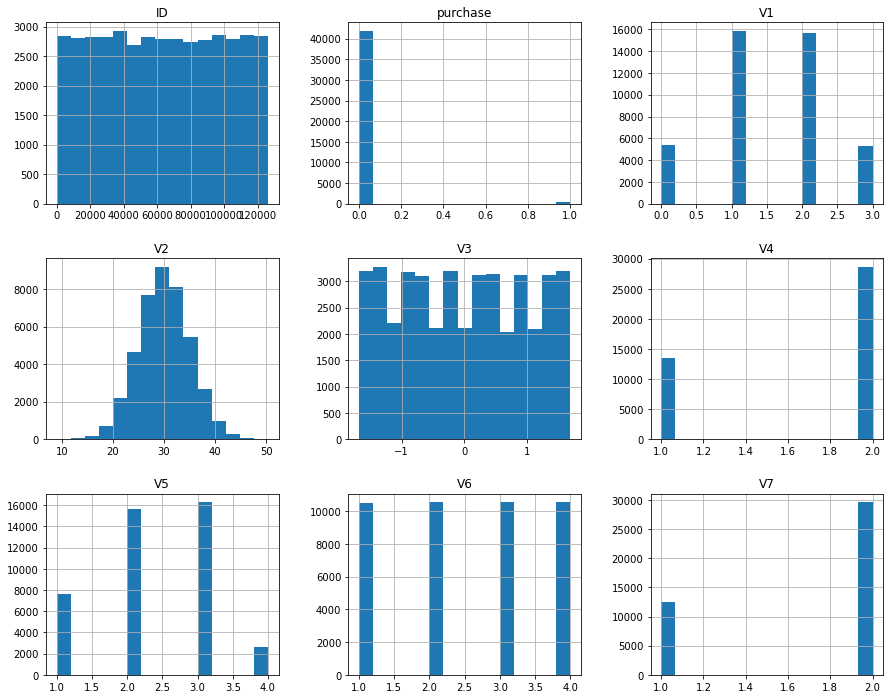

In [13]:
control.hist(figsize=(15,12),bins = 15)
plt.show()

In [14]:
# Incremental Response Rate (IRR)

irr = pur_treat.shape[0]/treatment.shape[0] - pur_control.shape[0]/control.shape[0]
irr

0.009454547819772702

In [15]:
# Net Incremental Revenue (NIR)

nir = 10 * pur_treat.shape[0] - 0.15 * treatment.shape[0] - 10 * pur_control.shape[0]
nir

-2334.5999999999995

<AxesSubplot:>

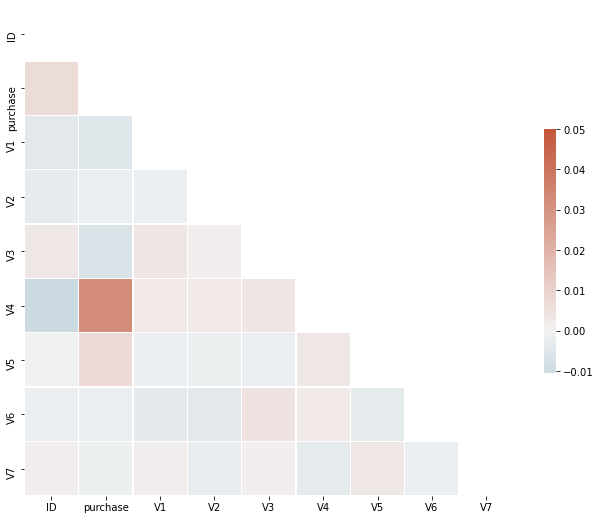

In [16]:
import seaborn as sns
import numpy as np

# Generate a mask for the upper triangle
corr = train_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.05, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()

promotion_mapping = {'Yes': 1, 'No': 0}
train_data['Promotion'] = train_data['Promotion'].map(promotion_mapping)

# Assuming 'purchase' is your target variable in both datasets
y_train = le.fit_transform(train_data["purchase"])
X_train = train_data.drop(columns=["purchase"])

# Standardize features for Training dataset
X_train = StandardScaler().fit_transform(X_train)

# Load Test dataset
test_data = pd.read_csv("datasets/Test.csv")
test_data['Promotion'] = test_data['Promotion'].map(promotion_mapping)

# Assuming 'purchase' is your target variable in both datasets
y_test = le.transform(test_data["purchase"])
X_test = test_data.drop(columns=["purchase"])

# Standardize features for Test dataset
X_test = StandardScaler().fit_transform(X_test)

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    # "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    #"Neural Net",
    #"AdaBoost",
    #"Naive Bayes",
    #"QDA",
    "XGBoost"
]

classifiers = [

    KNeighborsClassifier(3), 
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    #MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    #AdaBoostClassifier(random_state=42),
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
]

In [19]:
from sklearn.metrics import f1_score
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        acc_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        f_score = f1_score(y_test, y_pred, average='macro')
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.99 f1_score: 0.50 Model: Nearest Neighbors
accuracy: 0.99 f1_score: 0.50 Model: Linear SVM
accuracy: 0.99 f1_score: 0.50 Model: RBF SVM
accuracy: 0.99 f1_score: 0.50 Model: Decision Tree
accuracy: 0.99 f1_score: 0.50 Model: Random Forest
accuracy: 0.99 f1_score: 0.50 Model: XGBoost


In [20]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
from sklearn.metrics import classification_report

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
probabilities = model.predict_proba(X_test)[:, 1]

# Create a DataFrame with customer IDs and predicted probabilities
results_df = pd.DataFrame({'Customer_ID': test_data['ID'], 'Probability': probabilities})

# Rank customers based on predicted probabilities
results_df = results_df.sort_values(by='Probability', ascending=False)

# Set a threshold to identify the top customers
threshold = 0.8  # You can adjust this threshold based on your goals
selected_customers = results_df[results_df['Probability'] >= threshold]['Customer_ID']
selected_customers.shape

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     41170
           1       0.01      0.01      0.01       480

    accuracy                           0.98     41650
   macro avg       0.50      0.50      0.50     41650
weighted avg       0.98      0.98      0.98     41650



(575,)

In [24]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG,display, Image
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

#Function attributes
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]

def plot_decision_tree(maximum_depth,criterion_type,split_type) :
    
 
    #model
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score))
    
    #plot decision tree
    graph = tree.export_graphviz(clf,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = train_data.drop(columns=["purchase"]).columns.to_list(), 
                                        precision  = 2,
                                        class_names=["No purchase","Yes purchase"],
                                        filled = True,
                                       
                  )
    
    pydot_graph = pydotplus.graph_from_dot_data(graph)
    pydot_graph.set_size('"10,10"')
    plt = Image(pydot_graph.create_png())
    display(plt)
    
plot_decision_tree(3,"gini","best")

accuracy: 0.99 f1_score: 0.50


InvocationException: GraphViz's executables not found

In [34]:
# Assuming 'ID' is the column name in test_data
selected_entries = test_data[test_data['ID'].isin(selected_customers)]

# Display the selected entries
selected_entries.info()
selected_entries[(selected_entries['purchase'] == 1)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 47 to 41615
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         575 non-null    int64  
 1   Promotion  575 non-null    int64  
 2   purchase   575 non-null    int64  
 3   V1         575 non-null    int64  
 4   V2         575 non-null    float64
 5   V3         575 non-null    float64
 6   V4         575 non-null    int64  
 7   V5         575 non-null    int64  
 8   V6         575 non-null    int64  
 9   V7         575 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 49.4 KB


,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
2531,7774,1,1,2,28.461952,-0.385883,2,3,3,2
7384,22531,1,1,1,32.857030,0.566472,2,1,2,1
11286,34453,0,1,0,31.293367,0.479895,1,2,3,1
12793,39112,1,1,1,28.353436,-0.299306,2,2,2,2
16728,51111,1,1,2,31.267229,-0.818772,2,3,4,2
28136,85566,1,1,2,21.678476,-1.684550,2,1,2,1
36814,111605,0,1,2,29.876138,-1.424817,2,3,1,2


In [35]:
def calculate_irr_nir(df):
    # Treatment group
    treatment = df[df['Promotion'] == 'Yes']

    # Purchases in the treatment group
    pur_treat = df[(df['purchase'] == 1) & (df['Promotion'] == 'Yes')]

    # Control group
    control = df[df['Promotion'] == 'No']

    # Purchases in the control group
    pur_control = df[(df['purchase'] == 1) & (df['Promotion'] == 'No')]

    # Calculate IRR
    irr = pur_treat.shape[0] / treatment.shape[0] - pur_control.shape[0] / control.shape[0]

    # Calculate NIR
    nir = 10 * pur_treat.shape[0] - 0.15 * treatment.shape[0] - 10 * pur_control.shape[0]

    return irr, nir

# Example usage with your train_data DataFrame
irr_result, nir_result = calculate_irr_nir(selected_entries)
print("Incremental Response Rate (IRR):", irr_result)
print("Net Incremental Revenue (NIR):", nir_result)


ZeroDivisionError: division by zero